In [1]:
import numpy as np
import pandas as pd
import os
from mappings import map_country_id_to_country_name, map_month_id_to_datetime
from data_gathering import gather_data_features, gather_data_actuals
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data_cm_actual_2018, data_cm_actual_2019, data_cm_actual_2020, data_cm_actual_2021, data_cm_actual_allyears \
    = gather_data_actuals()

In [3]:
# Load country list with countries above average quantile, in which at least one conflict fatality occured and which are in the actuals data
with open(fr'C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\data\feature_and_actuals_countries_non_zero_above_avg_quantile.pkl', 'rb') as f:
    feature_and_actuals_countries_non_zero_above_avg_quantile = pickle.load(f)
filter =False
if filter:
    y_lim = 650
else:
    y_lim = 1200

In [4]:
# Optional setting for consistent font sized throughout the plots (not yet used)
legend_text_size = 13
title_text_size = 14
yax_text_size = 13
xax_text_size = 13
xticklabel_size = 12
yticklabel_size = 12

In [5]:
result_data_2018_FH = pd.read_parquet("mlruns/3/5b3acdf73aeb4eecb8bb007157f3535d/artifacts/BaselineModel_results_all_countries2018.parquet")
result_data_2019_FH = pd.read_parquet("mlruns/3/df6e7240234c40cebc96397963780cf9/artifacts/BaselineModel_results_all_countries2019.parquet")
result_data_2020_FH = pd.read_parquet("mlruns/3/301944cf5760482da0291a8e9daca4e1/artifacts/BaselineModel_results_all_countries2020.parquet")
result_data_2021_FH = pd.read_parquet("mlruns/3/3cc10d101573487aa558f41b21de99c5/artifacts/BaselineModel_results_all_countries2021.parquet")

In [6]:
result_data_2018_FH_and_M = pd.read_parquet("mlruns/3/9d8897f7efd242bdb33fdfe0c8c1eb6a/artifacts/BaselineModel_results_all_countries2018.parquet")
result_data_2019_FH_and_M = pd.read_parquet("mlruns/3/80caad1b10bf4513b5b5fbb9e8827d49/artifacts/BaselineModel_results_all_countries2019.parquet")
result_data_2020_FH_and_M = pd.read_parquet("mlruns/3/47685285ae8b45d38e966b28d5c27579/artifacts/BaselineModel_results_all_countries2020.parquet")
result_data_2021_FH_and_M = pd.read_parquet("mlruns/3/021e0fc647be407d8924e4d134093adc/artifacts/BaselineModel_results_all_countries2021.parquet")

In [7]:
# Filter the results for countries with more than 5 fatalities on average
if filter:
    result_data_2018_FH = result_data_2018_FH[result_data_2018_FH['country_id'].isin(feature_and_actuals_countries_non_zero_above_avg_quantile)]
    result_data_2019_FH = result_data_2019_FH[result_data_2019_FH['country_id'].isin(feature_and_actuals_countries_non_zero_above_avg_quantile)]
    result_data_2020_FH = result_data_2020_FH[result_data_2020_FH['country_id'].isin(feature_and_actuals_countries_non_zero_above_avg_quantile)]
    result_data_2021_FH = result_data_2021_FH[result_data_2021_FH['country_id'].isin(feature_and_actuals_countries_non_zero_above_avg_quantile)]


In [8]:
# Filter the results for countries with more than 5 fatalities on average
if filter:
    result_data_2018_FH_and_M = result_data_2018_FH_and_M[result_data_2018_FH_and_M['country_id'].isin(feature_and_actuals_countries_non_zero_above_avg_quantile)]
    result_data_2019_FH_and_M = result_data_2019_FH_and_M[result_data_2019_FH_and_M['country_id'].isin(feature_and_actuals_countries_non_zero_above_avg_quantile)]
    result_data_2020_FH_and_M = result_data_2020_FH_and_M[result_data_2020_FH_and_M['country_id'].isin(feature_and_actuals_countries_non_zero_above_avg_quantile)]
    result_data_2021_FH_and_M = result_data_2021_FH_and_M[result_data_2021_FH_and_M['country_id'].isin(feature_and_actuals_countries_non_zero_above_avg_quantile)]

In [9]:
def get_test_scores(df):
    # Create an empty DataFrame to hold the rearranged data
    rearranged_df = pd.DataFrame()

    # Loop over each row in the input DataFrame
    for index, row in df.iterrows():
        # Get the test_score from the DataFrame
        test_score = row['test_score']
        # Update the rearranged DataFrame with the rolling_window_length
        country_id = row['country_id']
        month_id = row['month_id']
        if country_id not in rearranged_df.index:
            rearranged_df.loc[country_id, month_id] = test_score
        else:
            rearranged_df.at[country_id, month_id] = test_score
    # Convert the DataFrame to integer type
    rearranged_df = rearranged_df.astype(float)

    return rearranged_df

In [10]:
def get_rolling_window_lengths(df):
    # Create an empty DataFrame to hold the rearranged data
    rearranged_df = pd.DataFrame()

    # Loop over each row in the input DataFrame
    for index, row in df.iterrows():
        # Build the path to the rolling_window_length file for the current run_id
        rolling_window_length_path = f'mlruns\\2\\{row["run_id"]}\\params\\rolling_window_length'

        # Read the value of rolling_window_length from the file
        try:
            with open(rolling_window_length_path, 'r') as f:
                rolling_window_length = f.read().strip()
        except FileNotFoundError:
            print(f"File not found for RunID: {row['run_id']}")
            rolling_window_length = None

        # Update the rearranged DataFrame with the rolling_window_length
        country_id = row['country_id']
        month_id = row['month_id']
        if country_id not in rearranged_df.index:
            rearranged_df.loc[country_id, month_id] = rolling_window_length
        else:
            rearranged_df.at[country_id, month_id] = rolling_window_length
    # Convert the DataFrame to integer type
    rearranged_df = rearranged_df.astype(int)

    return rearranged_df

def rename_indices(df):
    df.index = df.index.map(map_country_id_to_country_name)
    df.columns = df.columns.map(lambda x: map_month_id_to_datetime(x).strftime('%B %Y'))
    return df

In [11]:
def compute_medians(df):
    median_by_month = df.median(axis=0)
    median_by_country = df.median(axis=1)
    return median_by_month.astype(int), median_by_country.astype(int)


In [12]:
def compute_means(df):
    mean_by_month = df.mean(axis=0)
    mean_by_country = df.mean(axis=1)
    return mean_by_month, mean_by_country

In [13]:
def concatenate_dataframes(dfs):
    return pd.concat(dfs, axis=1).sort_index(axis=1)


In [14]:
def create_heatmap_org(df, figsize, cmap, year, cv_approach, countries: str, export=False):
    # Check data type and range

    plt.figure(figsize=figsize)
    ax = sns.heatmap(df, cmap=cmap, vmin=1, vmax=36, annot=False, cbar=True)  # Added explicit color bar

    # Increase font size and add padding for better visibility
    plt.title(f'Training Months for {year} and CV-Approach {cv_approach}', fontsize=34, pad=40)
    plt.xlabel('Forecasted Months', fontsize=32, labelpad=10)
    plt.ylabel('Countries', fontsize=32, labelpad=10)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Adjust color bar label size
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=24)
    
    # Replace spaces with underscores in cv_approach for file naming
    if cv_approach == "FH and M":
        cv_approach = "FH_and_M"

    # Export the plot if required
    if export:
        export_path = rf"C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Plots\rolling_window_heatmap\rolling_window_length_{cv_approach}_{year}_{countries}.png"
        plt.savefig(export_path, dpi=300, bbox_inches='tight')
    
    plt.show()

In [15]:
def create_heatmap_org_test_score(df, figsize, cmap, year, cv_approach, countries: str, export=False):
    # Check data type and range

    plt.figure(figsize=figsize)
    ax = sns.heatmap(df, cmap=cmap, annot=False, cbar=True)  # Added explicit color bar

    # Increase font size and add padding for better visibility
    plt.title(f'Test Score for {year} and CV-Approach {cv_approach}', fontsize=34, pad=40)
    plt.xlabel('Forecasted Months', fontsize=32, labelpad=10)
    plt.ylabel('Countries', fontsize=32, labelpad=10)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Adjust color bar label size
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=24)
    
    # Replace spaces with underscores in cv_approach for file naming
    if cv_approach == "FH and M":
        cv_approach = "FH_and_M"

    # Export the plot if required
    if export:
        export_path = rf"C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Plots\baseline_test_score_heatmap\test_score_{cv_approach}_{year}_{countries}.png"
        plt.savefig(export_path, dpi=300, bbox_inches='tight')
    
    plt.show()

In [16]:
def create_heatmap_org_test_score_vmax(df, figsize, cmap, year, cv_approach, countries: str,vmax, export=False):
    # Check data type and range

    plt.figure(figsize=figsize)
    ax = sns.heatmap(df, cmap=cmap, vmax=vmax, annot=False, cbar=True)  # Added explicit color bar

    # Increase font size and add padding for better visibility
    plt.title(f'Test Score for {year} and CV-Approach {cv_approach}', fontsize=34, pad=40)
    plt.xlabel('Forecasted Months', fontsize=32, labelpad=10)
    plt.ylabel('Countries', fontsize=32, labelpad=10)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Adjust color bar label size
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=24)
    
    # Replace spaces with underscores in cv_approach for file naming
    if cv_approach == "FH and M":
        cv_approach = "FH_and_M"

    # Export the plot if required
    if export:
        export_path = rf"C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Plots\baseline_test_score_heatmap\test_score_{cv_approach}_{year}_{countries}_vmax{vmax}.png"
        plt.savefig(export_path, dpi=300, bbox_inches='tight')
    
    plt.show()

In [17]:
result_data_2018_FH_and_M_rwl = get_rolling_window_lengths(result_data_2018_FH_and_M)
result_data_2019_FH_and_M_rwl = get_rolling_window_lengths(result_data_2019_FH_and_M)
result_data_2020_FH_and_M_rwl = get_rolling_window_lengths(result_data_2020_FH_and_M)
result_data_2021_FH_and_M_rwl = get_rolling_window_lengths(result_data_2021_FH_and_M)

In [18]:
result_data_2018_FH_and_M_rwl = rename_indices(result_data_2018_FH_and_M_rwl)
result_data_2019_FH_and_M_rwl = rename_indices(result_data_2019_FH_and_M_rwl)
result_data_2020_FH_and_M_rwl = rename_indices(result_data_2020_FH_and_M_rwl)
result_data_2021_FH_and_M_rwl = rename_indices(result_data_2021_FH_and_M_rwl)

In [19]:
result_data_2018_FH_rwl = get_rolling_window_lengths(result_data_2018_FH)
result_data_2019_FH_rwl = get_rolling_window_lengths(result_data_2019_FH)
result_data_2020_FH_rwl = get_rolling_window_lengths(result_data_2020_FH)
result_data_2021_FH_rwl = get_rolling_window_lengths(result_data_2021_FH)


In [20]:
result_data_2018_FH_rwl = rename_indices(result_data_2018_FH_rwl)
result_data_2019_FH_rwl = rename_indices(result_data_2019_FH_rwl)
result_data_2020_FH_rwl = rename_indices(result_data_2020_FH_rwl)
result_data_2021_FH_rwl = rename_indices(result_data_2021_FH_rwl)

In [21]:
result_data_2018_FH_test_score = get_test_scores(result_data_2018_FH)
result_data_2019_FH_test_score = get_test_scores(result_data_2019_FH)
result_data_2020_FH_test_score = get_test_scores(result_data_2020_FH)
result_data_2021_FH_test_score = get_test_scores(result_data_2021_FH)

In [22]:
result_data_2018_FH_test_score
from mappings import map_country_id_to_country_name, map_month_id_to_datetime

In [23]:
result_data_2018_FH_test_score = rename_indices(result_data_2018_FH_test_score)
result_data_2019_FH_test_score = rename_indices(result_data_2019_FH_test_score)
result_data_2020_FH_test_score = rename_indices(result_data_2020_FH_test_score)
result_data_2021_FH_test_score = rename_indices(result_data_2021_FH_test_score)


In [24]:
result_data_2018_FH_and_M_test_score = get_test_scores(result_data_2018_FH_and_M)
result_data_2019_FH_and_M_test_score = get_test_scores(result_data_2019_FH_and_M)
result_data_2020_FH_and_M_test_score = get_test_scores(result_data_2020_FH_and_M)
result_data_2021_FH_and_M_test_score = get_test_scores(result_data_2021_FH_and_M)


In [25]:
result_data_2018_FH_and_M_test_score = rename_indices(result_data_2018_FH_and_M_test_score)
result_data_2019_FH_and_M_test_score = rename_indices(result_data_2019_FH_and_M_test_score)
result_data_2020_FH_and_M_test_score = rename_indices(result_data_2020_FH_and_M_test_score)
result_data_2021_FH_and_M_test_score = rename_indices(result_data_2021_FH_and_M_test_score)

In [26]:
all_years_FH_rwl = concatenate_dataframes([result_data_2018_FH_rwl, result_data_2019_FH_rwl, result_data_2020_FH_rwl, result_data_2021_FH_rwl])
all_years_FH_and_M_rwl = concatenate_dataframes([result_data_2018_FH_and_M_rwl, result_data_2019_FH_and_M_rwl, result_data_2020_FH_and_M_rwl, result_data_2021_FH_and_M_rwl])

In [67]:
def plot_rwl_histogram(rwlengths, ylim, approach, export=False):
    rwlengths = rwlengths.values.flatten()
    # Create a histogram with ylim(0, 1100)
    sns.set_style('white')
    # Stil aktuell an R angespasst (helleres Blau, schwarze Kanten)
    sns.histplot(rwlengths, bins=36, color=sns.color_palette('Blues_r', 10)[5], edgecolor='black', kde=False, linewidth=0.66)

    # Set font sizes of ticks and labels
    plt.xticks(fontsize=xticklabel_size+2)
    plt.yticks(fontsize=yticklabel_size+2)
    plt.xlabel('Fixed Window Length', fontsize=xax_text_size+2)
    plt.ylabel('Count', fontsize=yax_text_size+2)
    plt.ylim(0, ylim)
    plt.xlim(1, 36)
    # plt.subplots_adjust(left=0.15, bottom=0.15)
    if export:
        export_path = rf"C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Plots\plots_for_results_section\rolling_window_length_histogram\rolling_window_length_histogram{approach}_ylim_{ylim}.png"
        plt.savefig(export_path, dpi=300)

In [71]:
export_rwl_FH = all_years_FH_rwl.values.flatten()
export_rwl_FH_df = pd.DataFrame(export_rwl_FH)
export_rwl_FH_and_M = all_years_FH_and_M_rwl.values.flatten()
export_rwl_FH_and_M_df = pd.DataFrame(export_rwl_FH_and_M)
export_path = 'C:/Users/Uwe Drauz/Documents/bachelor_thesis_local/personal_competition_data/Plots/plot_data'
# Export as csv
export_rwl_FH_df.to_csv(export_path + '/rolling_window_length_FH.csv', index=False)
export_rwl_FH_and_M_df.to_csv(export_path + '/rolling_window_length_FH_and_M.csv', index=False)

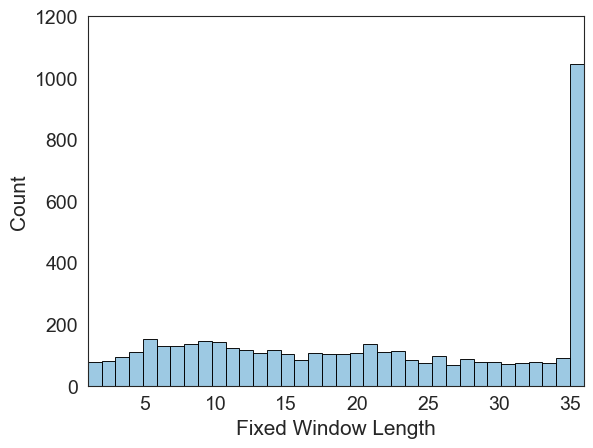

In [68]:
plot_rwl_histogram(all_years_FH_rwl, y_lim, 'FH', True)

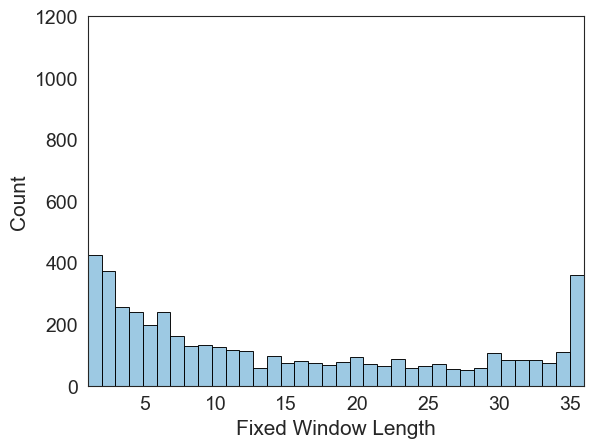

In [69]:
plot_rwl_histogram(all_years_FH_and_M_rwl, y_lim, 'FHM', True)

In [ ]:
# COncatenate the DataFrames of the test scores
all_years_FH_test_score = concatenate_dataframes([result_data_2018_FH_test_score, result_data_2019_FH_test_score, result_data_2020_FH_test_score, result_data_2021_FH_test_score])
all_years_FH_and_M_test_score = concatenate_dataframes([result_data_2018_FH_and_M_test_score, result_data_2019_FH_and_M_test_score, result_data_2020_FH_and_M_test_score, result_data_2021_FH_and_M_test_score])
# Create histograms for the test scores on a logarithmic scale
all_years_FH_test_score_np = all_years_FH_test_score.values
plt.hist(all_years_FH_test_score_np.flatten(), bins=36, log=True)
plt.show()
all_years_FH_and_M_test_score_np = all_years_FH_and_M_test_score.values
plt.hist(all_years_FH_and_M_test_score_np.flatten(), bins=36, log=True)
plt.show()

In [ ]:
FH_and_M_median_by_month, FH_and_M_median_by_country = compute_medians(all_years_FH_and_M_rwl)
FH_median_by_month, FH_median_by_country = compute_medians(all_years_FH_rwl)

In [ ]:
FH_and_M_mean_by_month, FH_and_M_mean_by_country = compute_means(all_years_FH_and_M_rwl)
FH_mean_by_month, FH_mean_by_country = compute_means(all_years_FH_rwl)

In [ ]:
figsize_all_countries = (12, 48)
figsize_selected_on_avg = (18, 15)
cmap = "Blues"

In [ ]:
create_heatmap_org(result_data_2018_FH_rwl, figsize_selected_on_avg, cmap, 2018, "FH", countries="selected_on_avg", export=True)
create_heatmap_org(result_data_2019_FH_rwl, figsize_selected_on_avg, cmap, 2019, "FH", countries="selected_on_avg", export=True)
create_heatmap_org(result_data_2020_FH_rwl, figsize_selected_on_avg, cmap, 2020, "FH", countries="selected_on_avg", export=True)
create_heatmap_org(result_data_2021_FH_rwl, figsize_selected_on_avg, cmap, 2021, "FH", countries="selected_on_avg", export=True)
create_heatmap_org(result_data_2018_FH_and_M_rwl, figsize_selected_on_avg, cmap, 2018, "FH and M", countries="selected_on_avg", export=True)
create_heatmap_org(result_data_2019_FH_and_M_rwl, figsize_selected_on_avg, cmap, 2019, "FH and M", countries="selected_on_avg", export=True)
create_heatmap_org(result_data_2020_FH_and_M_rwl, figsize_selected_on_avg, cmap, 2020, "FH and M", countries="selected_on_avg", export=True)
create_heatmap_org(result_data_2021_FH_and_M_rwl, figsize_selected_on_avg, cmap, 2021, "FH and M", countries="selected_on_avg", export=True)

In [ ]:
cmap = "Blues"

In [ ]:
create_heatmap_org_test_score(result_data_2018_FH_test_score, figsize_selected_on_avg, cmap, 2018, "FH", countries="selected_on_avg", export=True)
create_heatmap_org_test_score(result_data_2019_FH_test_score, figsize_selected_on_avg, cmap, 2019, "FH", countries="selected_on_avg", export=True)
create_heatmap_org_test_score(result_data_2020_FH_test_score, figsize_selected_on_avg, cmap, 2020, "FH", countries="selected_on_avg", export=True)
create_heatmap_org_test_score(result_data_2021_FH_test_score, figsize_selected_on_avg, cmap, 2021, "FH", countries="selected_on_avg", export=True)
create_heatmap_org_test_score(result_data_2018_FH_and_M_test_score, figsize_selected_on_avg, cmap, 2018, "FH and M", countries="selected_on_avg", export=True)
create_heatmap_org_test_score(result_data_2019_FH_and_M_test_score, figsize_selected_on_avg, cmap, 2019, "FH and M", countries="selected_on_avg", export=True)
create_heatmap_org_test_score(result_data_2020_FH_and_M_test_score, figsize_selected_on_avg, cmap, 2020, "FH and M", countries="selected_on_avg", export=True)
create_heatmap_org_test_score(result_data_2021_FH_and_M_test_score, figsize_selected_on_avg, cmap, 2021, "FH and M", countries="selected_on_avg", export=True)

In [ ]:
export_path = rf"C:\Users\Uwe Drauz\Documents\bachelor_thesis_local\personal_competition_data\Plots\rolling_window_length_{validation_approach}_{year}.png"

In [ ]:
# Export the plots to the path with correspinding name


In [ ]:
# Determine the number of countries with a least one value in "test_score" greater than 0
result_data_2018_FH_and_M[result_data_2018_FH_and_M['test_score'] > 5]['country_id'].nunique()

In [ ]:
data = data.pivot("month", "year", "passengers")
sns.heatmap(data, cmap="rocket")
plt.show()

In [ ]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue, cmap="Blues_r")